In [2]:
import config as cfg
from preprocess import Preprocess
from utils.preprocess import Patient
from utils.plot import *

# I - Utilisation de la classe Patient & des fonctions de plots

In [3]:
config = cfg.Preprocess()
preprocessor = Preprocess(config.input_dir, config.output_dir, config.max_depth)

In [4]:
RANDOM_INDEX = 30

In [5]:
patient = Patient(*preprocessor.dataset_paths[RANDOM_INDEX])

In [6]:
print(patient.nb_slices)
print(patient.side_length)
print(patient.annotations)

64
512
[(307.4427332472215, 273.9070275794524, 23), (350.698669997587, 251.58138280507018, 23), (360.9312571858455, 236.2325020226824, 24), (322.7916140296092, 268.32561638585685, 24), (313.48926204028334, 286.93032036450865, 26), (340.9312004087948, 311.11643553675606, 29), (263.72167889738967, 187.3951540787214, 29), (234.41927013101304, 172.5113908957999, 31), (374.41966757036806, 165.53462690380547, 31), (345.11725880399143, 317.1629643298179, 31), (232.09368213368157, 166.92997970220438, 33), (341.86143560772734, 326.4653163191438, 33), (381.39643156236247, 154.3718045166144, 35), (358.605669188514, 331.11649231380676, 38), (363.72196278264323, 329.72113951540786, 41), (368.8382563767725, 322.74437552341345, 43), (391.629018750621, 302.2792011468964, 46)]


In [7]:
ANNOTATED_SLICE = patient.annotations[8][2]
ANNOTATED_SLICE

31

In [8]:
patient.make_mask(config.cube_side)

In [9]:
patient.mask_voxel_array.shape

(512, 512, 64)

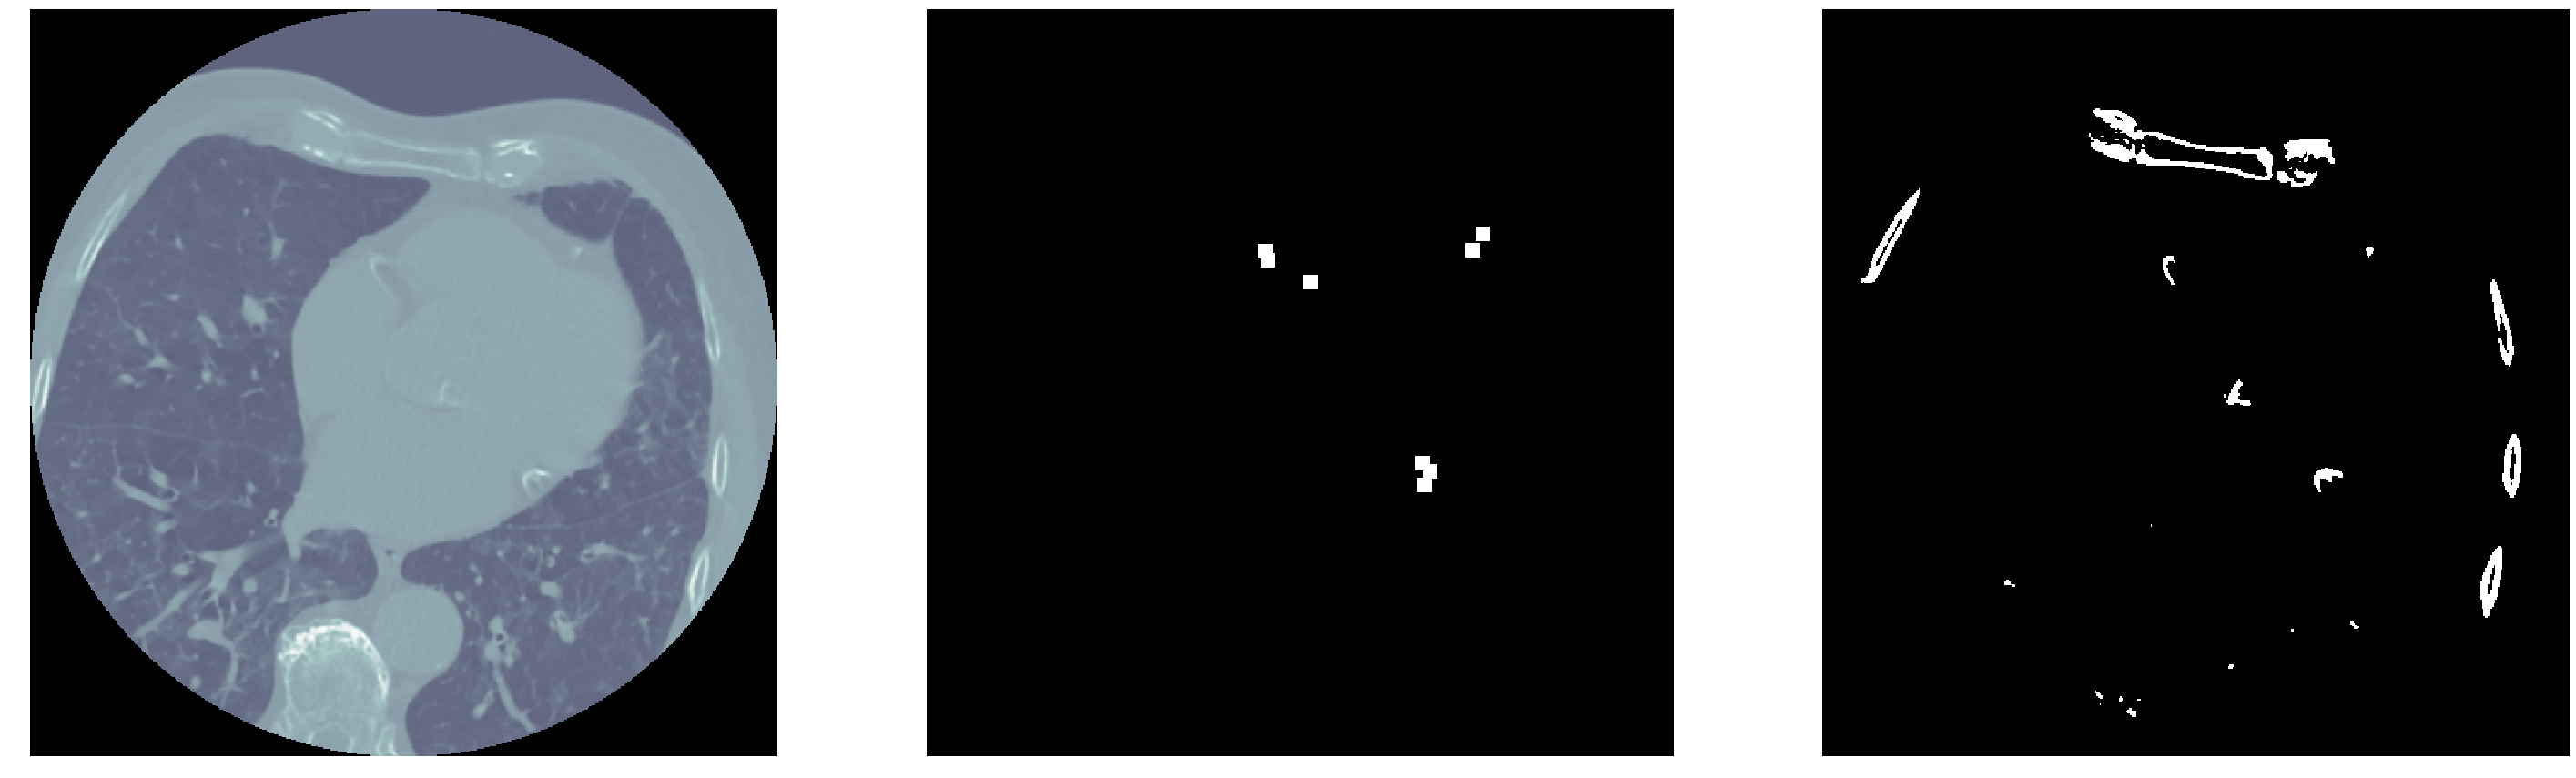

In [10]:
compare_3_images(patient.scan_voxel_array[:,:,ANNOTATED_SLICE],
                 patient.annotations_mask[:,:,ANNOTATED_SLICE],
                 patient.threshold_mask[:,:,ANNOTATED_SLICE])

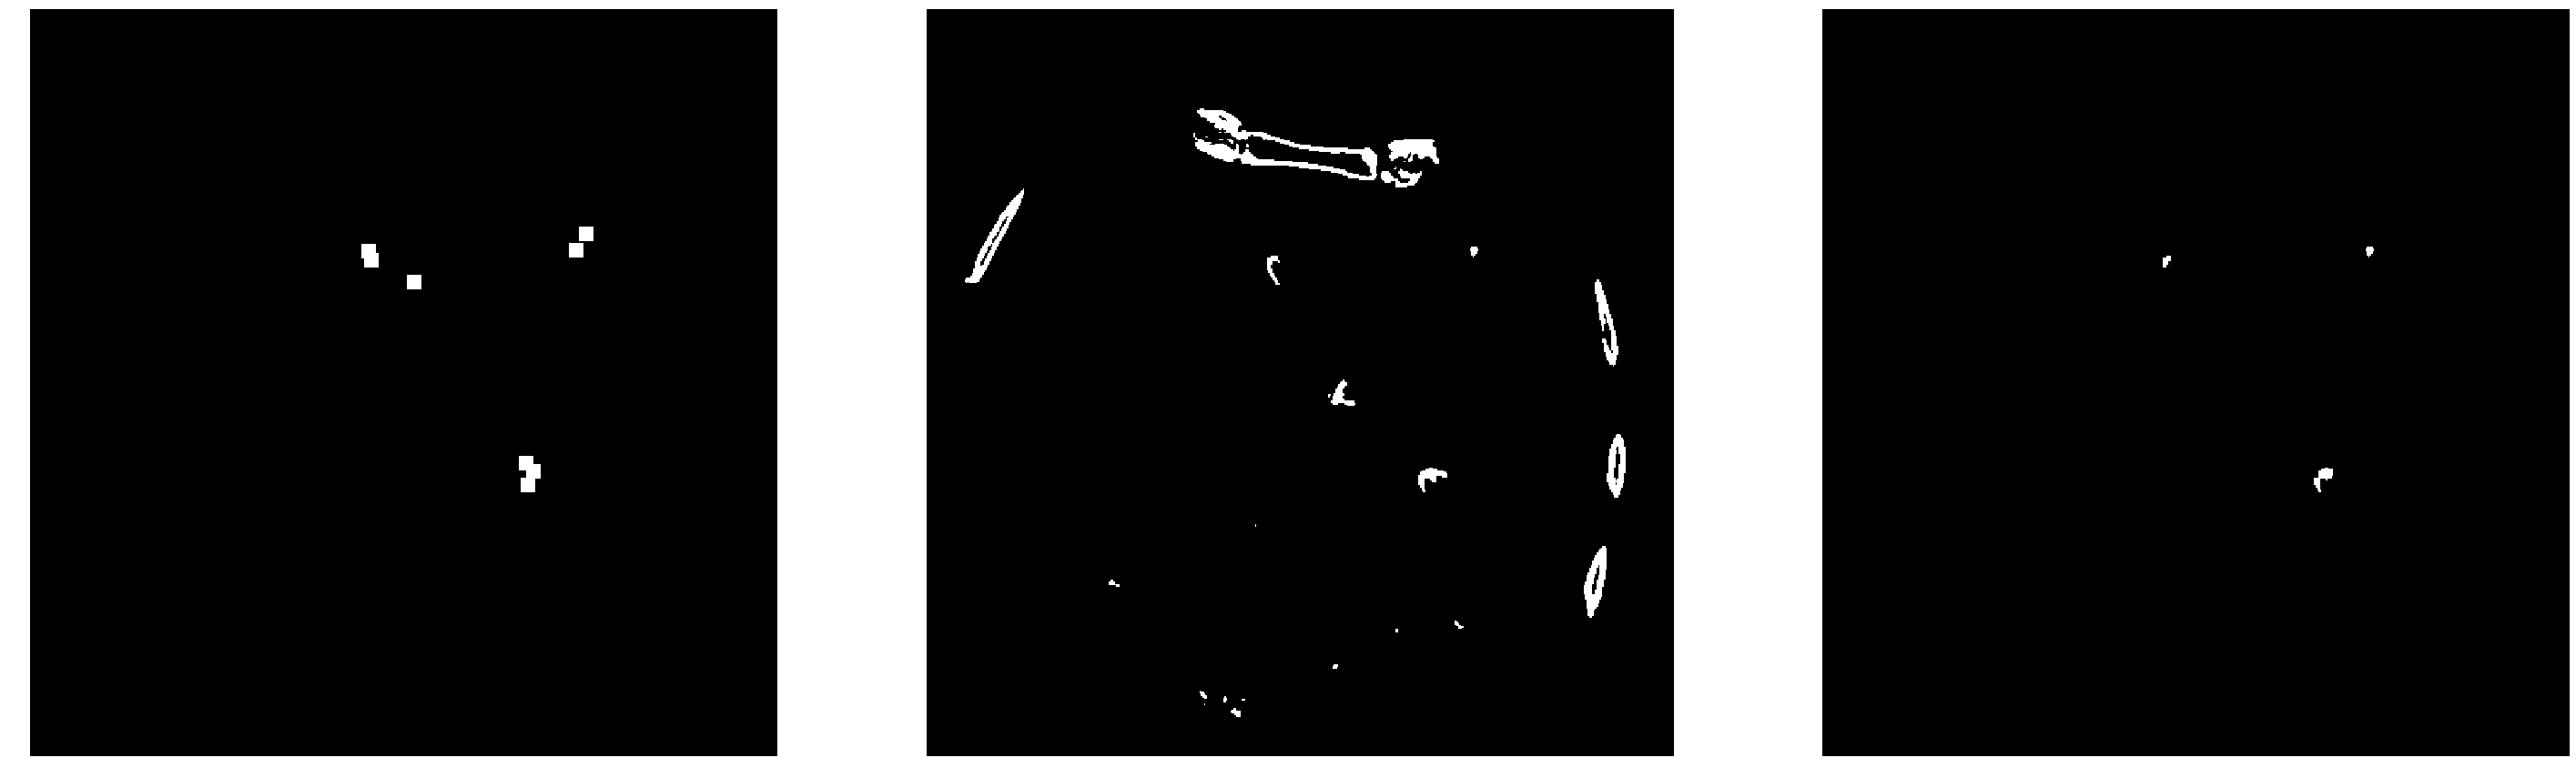

In [11]:
compare_3_images(patient.annotations_mask[:,:,ANNOTATED_SLICE],
                 patient.threshold_mask[:,:,ANNOTATED_SLICE],
                 patient.mask_voxel_array[:,:,ANNOTATED_SLICE])

In [14]:
sample_scan_slice = patient.scan_voxel_array[:,:,ANNOTATED_SLICE]
sample_mask_slice = patient.mask_voxel_array[:,:,ANNOTATED_SLICE]
sample_annotations = patient.annotations[8]

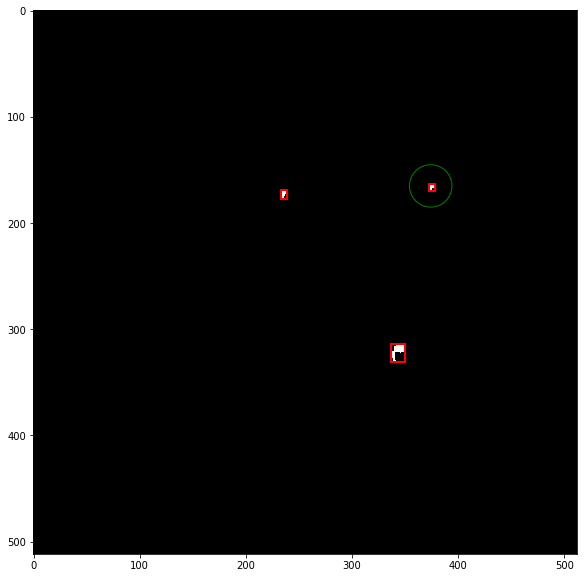

In [13]:
plot_bboxes_with_annotation_on_mask(sample_slice, sample_annotations)

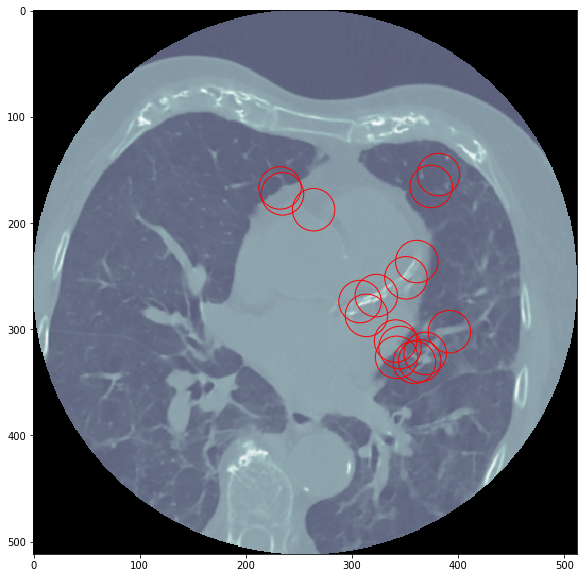

In [17]:
    plot_patched_voxel_array_slice_with_annotations(patient.scan_voxel_array, patient.annotations)

# II - Vérification du preprocessing

In [25]:
import numpy as np

In [26]:
preprocessed_scan_path, preprocessed_mask_path = preprocessor.output_paths[RANDOM_INDEX]

In [27]:
sample_preprocessed_scan = np.load(preprocessed_scan_path)
sample_preprocessed_mask = np.load(preprocessed_mask_path)

In [28]:
print(sample_preprocessed_mask.shape)
print(sample_preprocessed_mask.shape)

(362, 362, 48)
(362, 362, 48)


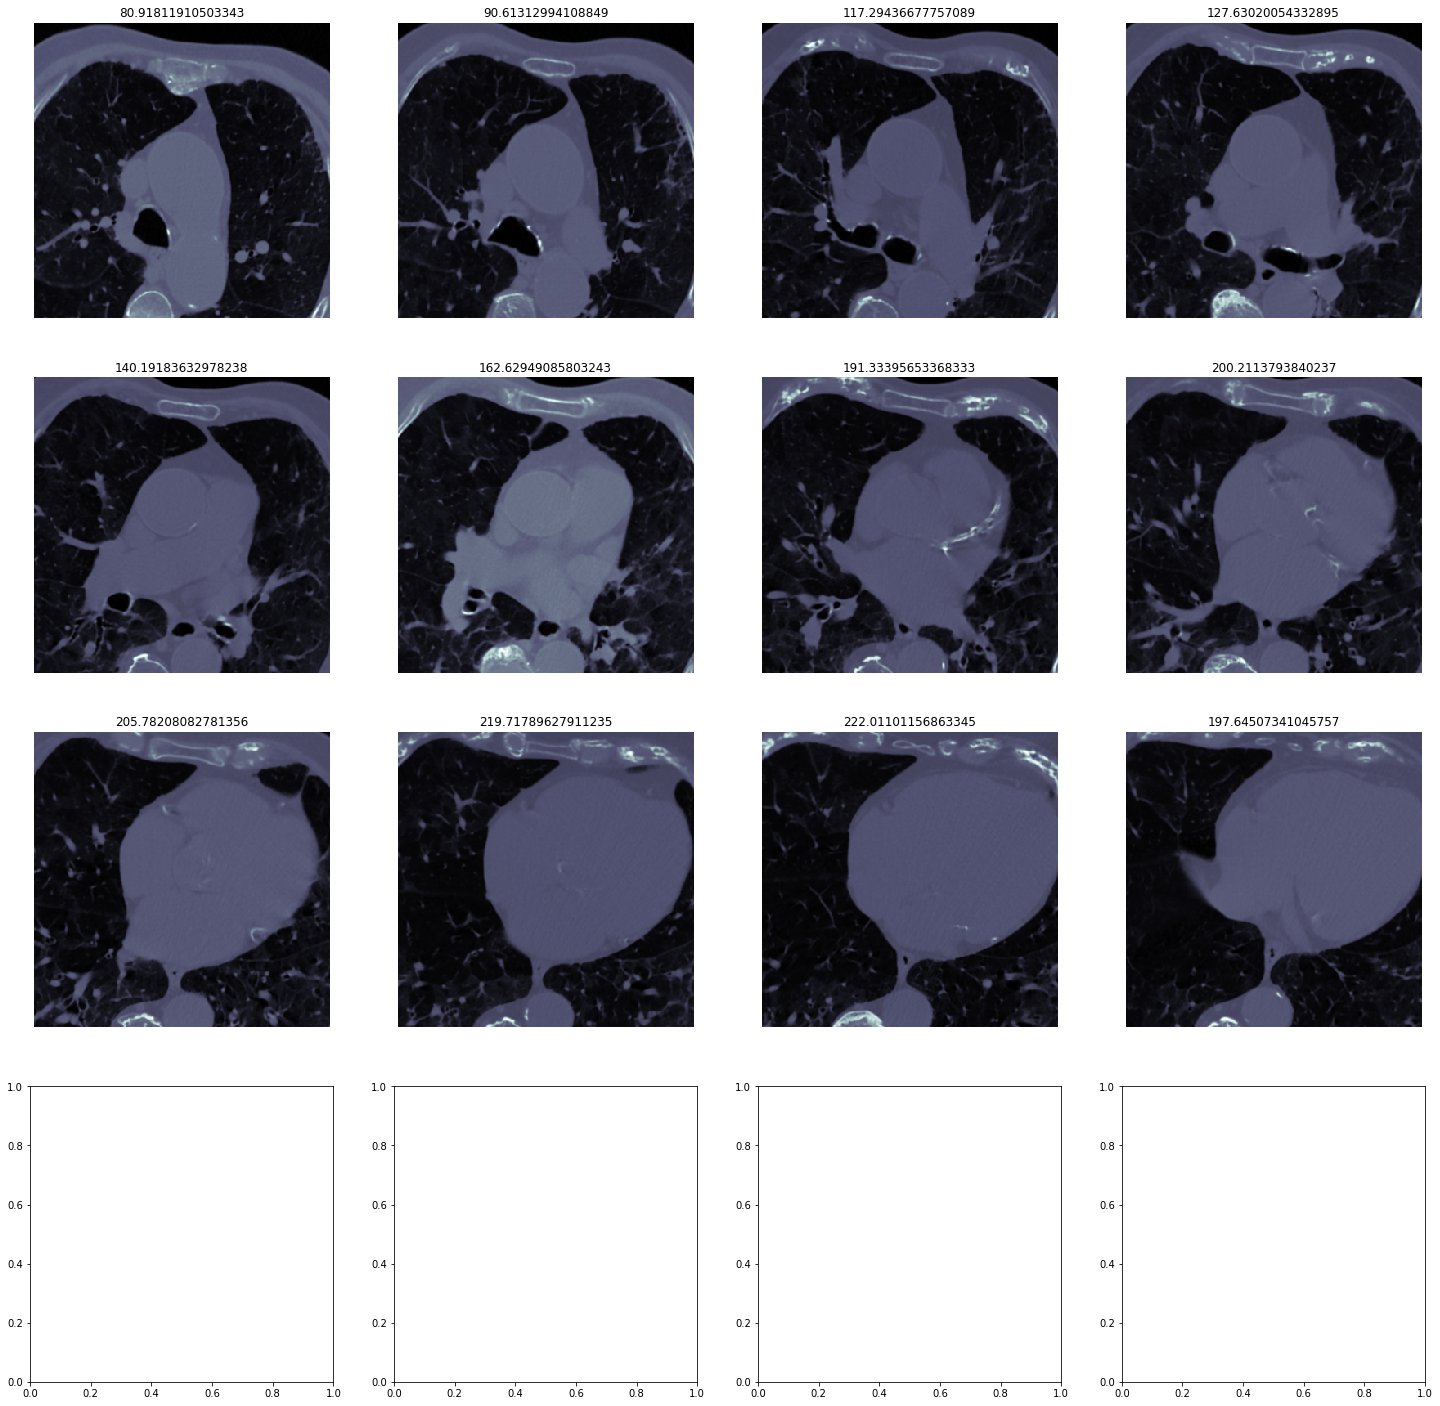

In [30]:
plot_slices(sample_preprocessed_scan, 4)

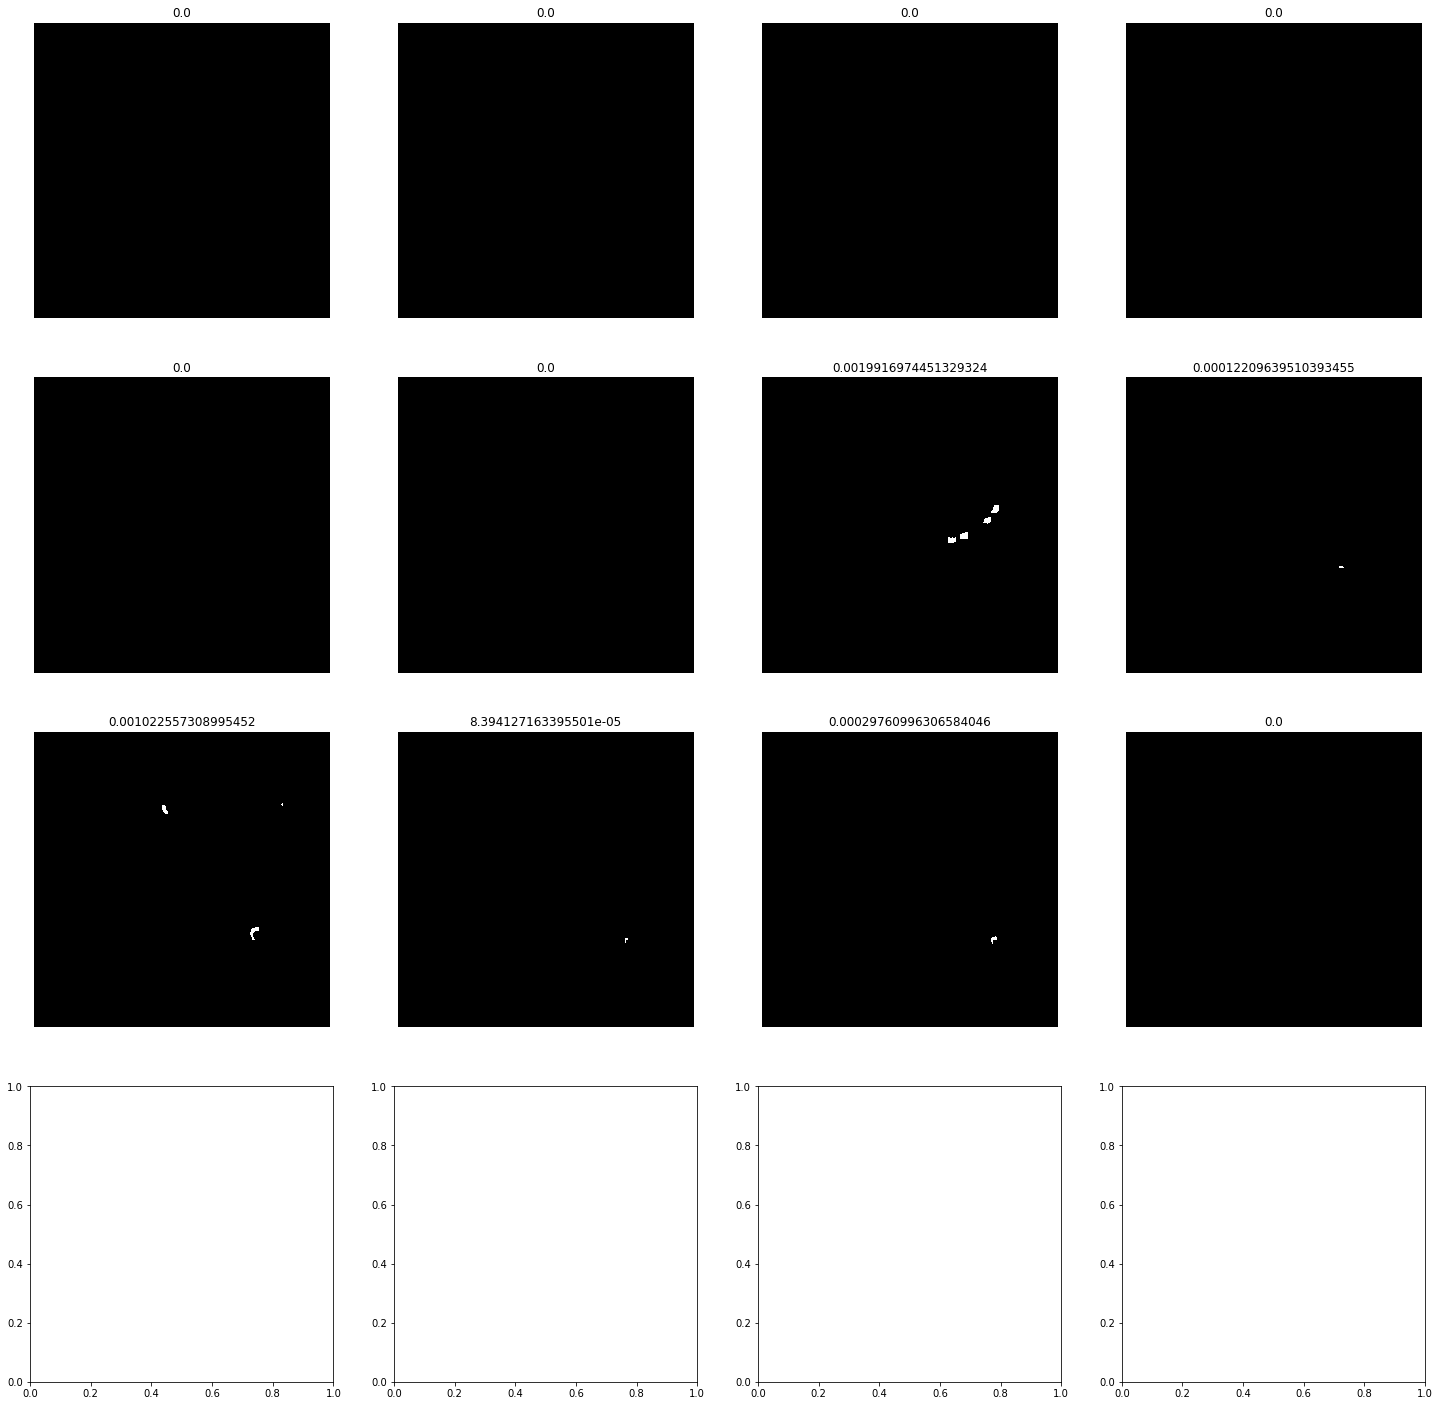

In [31]:
plot_slices(sample_preprocessed_mask, 4)